<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 02-2 de Data Science

# Regressão Linear Múltipla
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão linear Múltipla
* Calcular o erro R^2
* Calcular o MAD,MSE e MSRE

## Bibliotecas

In [1]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [2]:
# O objeto ainda está vazio. 
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

## Regressão Linear Múltipla

### Revisando

$$
    X_k : Variáveis \ independentes \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta_1  X_1 \ + \ \beta_2  X_2 \ + \ ... + \ \beta_k  X_k
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando todos X são 0.
* b1, b2, bk : são os coeficientes de regressão, que representam a influência de cada variável X independente em Yhat

### Implementação

<p>Vamos desenvolver um modelo utilizando as seguintes variáveis como preditoras.</p>
<ul>
    <li>Horsepower</li>
    <li>Highway-mpg</li>
</ul>


In [3]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [4]:
# Ajustando o novo dataframe
df_linear_multipla = df[['price','horsepower', 'highway-mpg']].copy(deep=True)
df_linear_multipla = df_linear_multipla.rename(columns={'highway-mpg': 'highway_mpg'})

# Criando as novas variáveis
X = df_linear_multipla[['horsepower', 'highway_mpg']]
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.6636


* Calcular os valores previstos:

In [5]:
#Fazendo a predição dos dados

YHatLinMult = lm.predict(X)

In [6]:
# Carregando os valores previstos para o dataframe
df_linear_multipla.loc[:,'YHat'] = YHatLinMult

# Visualizando as primeiras linhas do dataframe
df_linear_multipla.head(5)

,price,horsepower,highway_mpg,YHat
0,13495.0,111.0,27,14968.953471
1,16500.0,111.0,27,14968.953471
2,16500.0,154.0,26,21439.073979
3,13950.0,102.0,30,13123.501680
4,17450.0,115.0,22,16434.589730


In [7]:
# Analisando a estatística descritiva
df_linear_multipla[['price','YHat']].describe()

,price,YHat
count,201.000000,201.000000
mean,13207.129353,13207.129353
std,7947.066342,6473.906102
min,5118.000000,1170.651666
25%,7775.000000,7735.414337
50%,10295.000000,12478.697477
75%,16500.000000,15673.064886
max,45400.000000,38831.743422


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

Text(45000, 3.3e-05, 'SCORE: 0.663619')

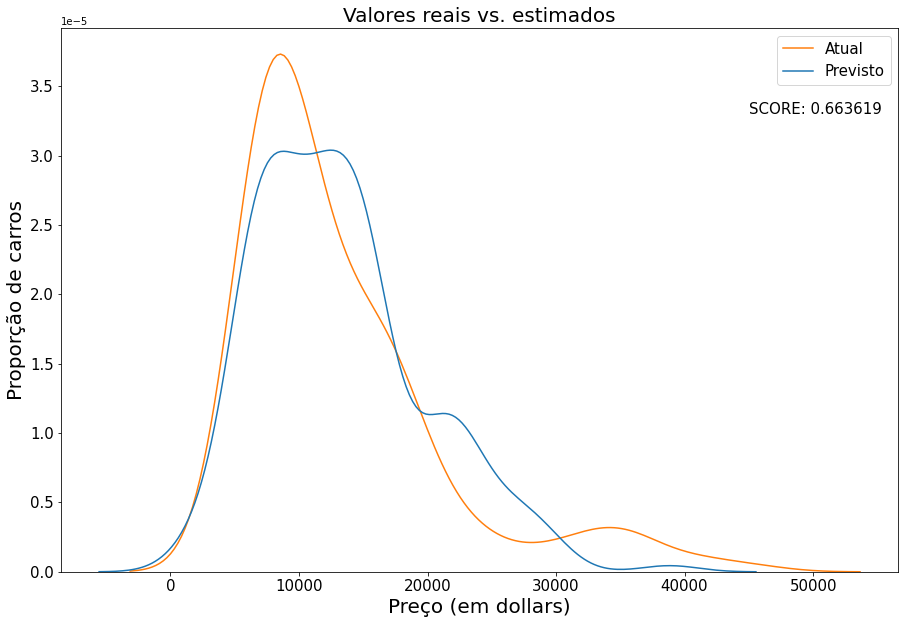

In [8]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

### Cálculo dos erros

Text(0.5, 0, 'Resíduo (em dollars)')

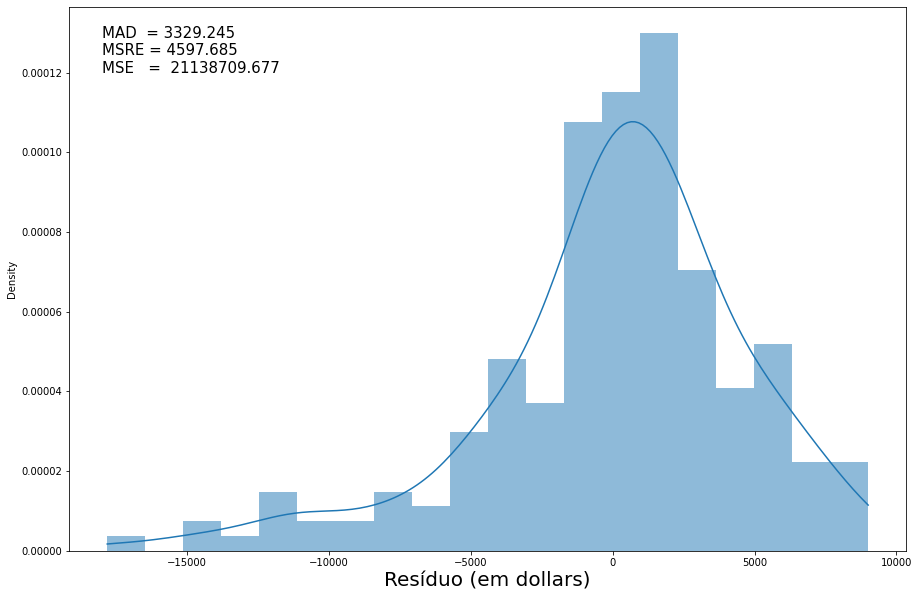

In [9]:
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

# Erro absoluto
df_linear_multipla.loc[:,'AbsDeviation'] = abs(df_linear_multipla['YHat']-df_linear_multipla['price'])

# Quadrado do erro absolulto
df_linear_multipla.loc[:,'SquaredError'] = (df_linear_multipla['price']-df_linear_multipla['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_linear_multipla['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear_multipla['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-18000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

## Mostrando o hiperplano (apenas para fins didáticos)

Text(0.5, 0, 'Price')

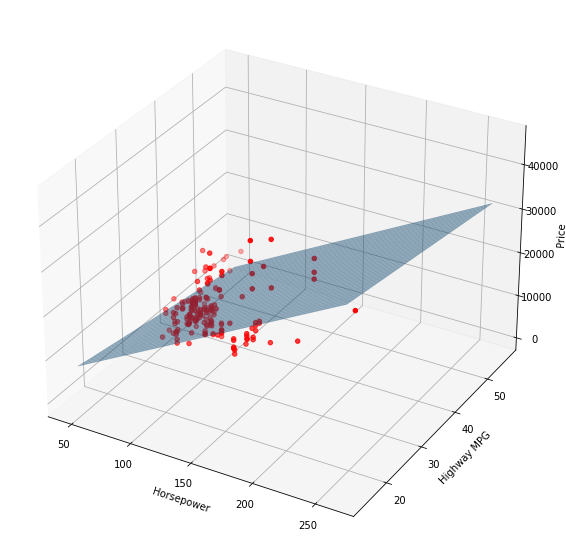

In [10]:
# O intervalo entre os pontos da malha de pontos
mesh_size = .02

# Margem do da área de plotagem
margin = 2

# Valores mínimos e máximos da malha
x_min, x_max = X['horsepower'].min() - margin, X['horsepower'].max() + margin
y_min, y_max = X['highway_mpg'].min() - margin, X['highway_mpg'].max() + margin

# A função arrange cria uma sequencia com base no menor e maior valor espaçados igualmente pelo mash_size
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# A função meshgrid cria uma grade de pontos bidimensional com base nos pontos de xrange yrange
xx, yy = np.meshgrid(xrange, yrange)

# ravel() retorna uma matriz achatada (unidimensional) com todos os elementos da matriz original em sequência.
# column_stack() empilha as matrizes unidimensionais em colunas, criando assim uma nova matriz bidimensional.
X_pred = np.column_stack((xx.ravel(), yy.ravel()))

## criando um dataframe
X_pred = pd.DataFrame(X_pred, columns=['horsepower', 'highway_mpg'])

# fazer a previsão de Y com base na malha com os pontos criados
Y_pred = lm.predict(X_pred)

# Criando a área do gráfico
fig = plt.figure(figsize=(20,10))

# Criando um subplot do tipo 3d
ax = fig.add_subplot(111, projection='3d')

# Criando um gráfico de dispersão de pontos 
ax.scatter(X['horsepower'], X['highway_mpg'], Y, c='r', marker='o')

# Transformando novamente os valores preditos no shape bidmensional
Z = Y_pred.reshape(xx.shape)

# Criando o gráfico de superfície
ax.plot_surface(xx, yy, Z , alpha=0.5)

# Passando rótulos dos eixos
ax.set_xlabel('Horsepower')
ax.set_ylabel('Highway MPG')
ax.set_zlabel('Price')

## Referências:

Translated and inspired in the material developed by IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |